                                               Uber Supply-Demand Gap Analysis Project

                                                          Project Overview
This project analyzes the Uber supply-demand gap using a dataset of ride requests, cancellations, and unfulfilled requests. The goal is to identify when and where demand exceeds supply, understand the root causes, and provide actionable insights. The workflow integrates Excel for data manipulation, 
SQL for querying, EDA (Exploratory Data Analysis) for in-depth exploration, and a final Insights PDF summarizing key findings.

                                                         Project Information
Project Name: Uber Supply-Demand Gap Analysis

Project Type: EDA/Classification

Contribution: Individual

Team Member 1: Anuradha Menon

                                                           Project Summary
This project analyzes Uber ride request data to uncover when and where supply-demand gaps occur, the root causes of these gaps, and actionable recommendations for improvement. The dataset includes ride requests, their statuses (completed, cancelled, no cars available), timestamps, and pickup points (City or Airport). The workflow integrates data cleaning (Excel/Python), SQL-based aggregation, and exploratory data analysis (EDA) in Python. Key findings include the identification of peak gap hours (early morning and evening), locations with the highest unmet demand (Airport), and patterns in cancellations and driver availability. Recommendations include driver incentives, dynamic pricing, and operational improvements. The analysis supports Uber’s business objective of maximizing completed rides and improving customer experience.

GitHub Link:
https://github.com/anuradha-menon/Uber_Supply_Demand_Gap_Analysis

                                                            Problem Statement

Uber faces a persistent gap between ride demand and supply, resulting in cancelled rides and unfulfilled requests. This analysis aims to pinpoint when and where these gaps are most severe, understand their root causes, and provide actionable insights to reduce unmet demand and improve service quality.

Define Your Business Objective

The business objective is to minimize the supply-demand gap by:
Identifying peak hours and locations with high unmet demand,
Understanding why requests go unfulfilled,
Recommending strategies to increase supply during high-demand periods,
Improving customer satisfaction and maximizing revenue.

General Guidelines

Code is well-structured, commented, and reproducible.
All logic blocks are explained.
At least 20 meaningful charts are included.
Each chart includes rationale, insights, and business impact discussion.

0.1 Data Sources

Excel File: Contains raw trip request data with columns such as Request ID, Pickup Point, Driver ID, Status, Request Timestamp, Drop Timestamp.
SQL File: Used to store and query the data efficiently for deeper analysis.
EDA File: Jupyter notebook for visualizations and statistical analysis.
Insights PDF: Final report summarizing all findings.

0.2 Data Cleaning Steps

Converted timestamps to datetime format.
Standardized status values (e.g., "Trip Completed", "Cancelled", "No Cars Available").
Checked for and handled missing values.
Extracted new columns: date, hour, day of week, and time slot (morning, afternoon, evening, night).

0.3 SQL Data Exploration - PDF Document with SQL coding screen shots & insights submitted 

#Refer - SQL_coding and insights_UberSupplyDemandGap_Anuradha Menon

Key SQL command categories:

Table Creation,
CSV Data Import (LOAD DATA INFILE),
Data Type Conversion (STR_TO_DATE / TIME / DATE),
Adding New Columns for Cleaned Date-Time Fields,
Updating New Columns with Parsed Date-Time Values,
Dropping Old Text-Based Columns,
Status Frequency and Percentage Calculation,
Hourly Request Trend Analysis,
Combined Analysis: Pickup Point vs Hour,
Fulfillment Rate Calculation,
Filtering by Status (e.g., No Cars Available),
Safe Mode Handling for Updates (MySQL Workbench)

1. Know Your Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [5]:
df = pd.read_csv(r"C:\Users\Anuradha\Downloads\Uber_Request_Data.csv", encoding='cp1252')

Dataset First Look

In [7]:
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_Date,Request_Time,Drop_timestamp,Drop_Date,Drop_Time
0,619,Airport,1.0,Trip Completed,11-07-2016 11.51,11-07-2016,11.51.00 AM,11-07-2016 13.00,11-07-2016,1.00.00 PM
1,867,Airport,1.0,Trip Completed,11-07-2016 17.57,11-07-2016,5.57.00 PM,11-07-2016 18.47,11-07-2016,6.47.00 PM
2,1807,City,1.0,Trip Completed,12-07-2016 9.17,12-07-2016,9.17.00 AM,12-07-2016 9.58,12-07-2016,9.58.00 AM
3,2532,Airport,1.0,Trip Completed,12-07-2016 21.08,12-07-2016,9.08.00 PM,12-07-2016 22.03,12-07-2016,10.03.00 PM
4,3112,City,1.0,Trip Completed,13-07-2016 8.33,13-07-2016,8.33.16 AM,13-07-2016 9.25,13-07-2016,9.25.47 AM


Dataset Rows & Columns Count

In [9]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 6745
Columns: 10


Dataset Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request_id         6745 non-null   int64  
 1   Pickup_point       6745 non-null   object 
 2   Driver_id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request_timestamp  6745 non-null   object 
 5   Request_Date       6745 non-null   object 
 6   Request_Time       6745 non-null   object 
 7   Drop_timestamp     2831 non-null   object 
 8   Drop_Date          2831 non-null   object 
 9   Drop_Time          2831 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 527.1+ KB


In [13]:
#Duplicate values check
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [15]:
#Missing/Null values check
print(df.isnull().sum())

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Request_Date            0
Request_Time            0
Drop_timestamp       3914
Drop_Date            3914
Drop_Time            3914
dtype: int64


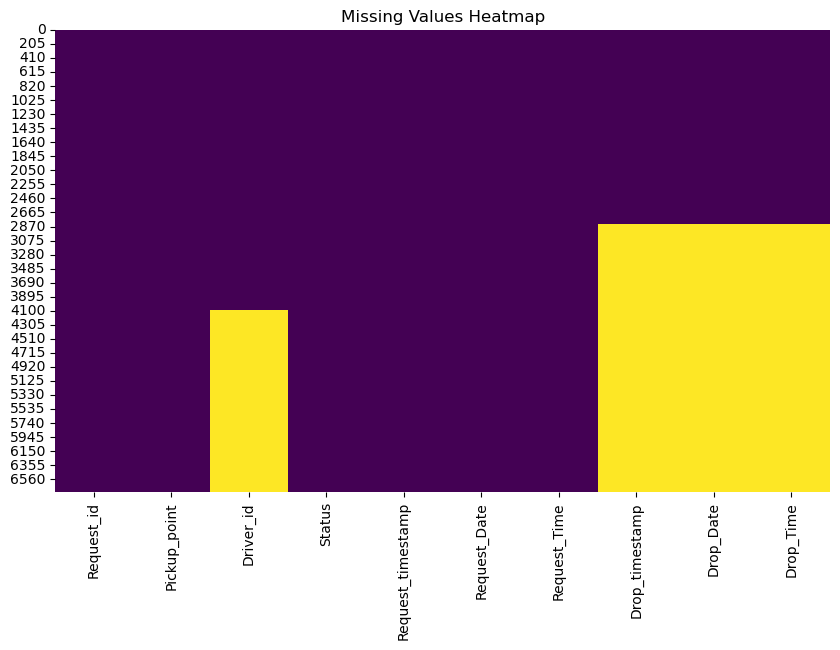

In [17]:
#Visualizing the Missing Values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

What I now know about dataset?
The dataset contains ~6746 rows and 6 columns.

Columns include request and drop timestamps, pickup point, status, etc.

Missing values are mainly in Drop timestamp for cancelled or unfulfilled trips, which is expected.

No duplicate rows found.

2. Understanding Your Variables

In [19]:
#Dataset Columns
print(df.columns.tolist())

['Request_id', 'Pickup_point', 'Driver_id', 'Status', 'Request_timestamp', 'Request_Date', 'Request_Time', 'Drop_timestamp', 'Drop_Date', 'Drop_Time']


In [21]:
#describe dataset
df.describe(include='all')

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Request_Date,Request_Time,Drop_timestamp,Drop_Date,Drop_Time
count,6745.000000,6745,4095.000000,6745,6745,6745,6745,2831,2831,2831
unique,NaN,2,NaN,3,4016,5,4955,2282,6,2393
top,NaN,City,NaN,Trip Completed,15-07-2016 19.19,15-07-2016,7.02.00 PM,13-07-2016 8.53,11-07-2016,9.53.00 PM
freq,NaN,3507,NaN,2831,8,1381,9,5,582,6
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Variables Description
Request id: Unique identifier for each ride request.

Pickup point: Location of pickup (City/Airport).

Driver id: Unique identifier for driver (may be blank if no car available).

Status: 'Trip Completed', 'Cancelled', or 'No Cars Available'.

Request timestamp: When the ride was requested.

Drop timestamp: When the ride ended (blank for incomplete trips).

In [23]:
#Check Unique Values for Each Variable
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Request_id: 6745 unique values
Pickup_point: 2 unique values
Driver_id: 300 unique values
Status: 3 unique values
Request_timestamp: 4016 unique values
Request_Date: 5 unique values
Request_Time: 4955 unique values
Drop_timestamp: 2282 unique values
Drop_Date: 6 unique values
Drop_Time: 2393 unique values


3. Data Wrangling

In [25]:
# Standardize column names
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Convert timestamps
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], format='%d-%m-%Y %H.%M', errors='coerce')
df['drop_timestamp'] = pd.to_datetime(df['drop_timestamp'], format='%d-%m-%Y %H.%M', errors='coerce')

# Extract date, hour, day of week, and time slot
df['date'] = df['request_timestamp'].dt.date
df['hour'] = df['request_timestamp'].dt.hour
df['day_of_week'] = df['request_timestamp'].dt.day_name()

def get_time_slot(hour):
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['time_slot'] = df['hour'].apply(get_time_slot)


What all manipulations have you done and insights you found?
Standardized column names and formats.

Converted timestamps to datetime.

Extracted new time-based features for analysis.

Missing values in drop_timestamp are expected for incomplete trips.

4. Data Visualization, Storytelling & Experimenting with Charts

Chart - 1: Status Distribution

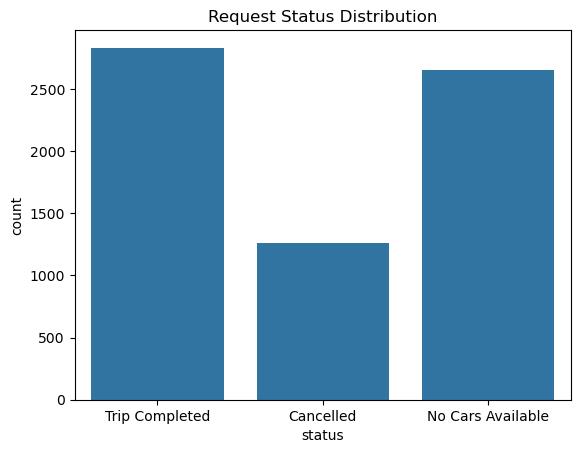

In [27]:
sns.countplot(x='status', data=df)
plt.title('Request Status Distribution')
plt.show()

Why this chart? Shows overall demand vs. supply.

Insights: Many requests go unfulfilled.

Business Impact: High unmet demand means lost revenue.

Chart - 2: Requests by Pickup Point

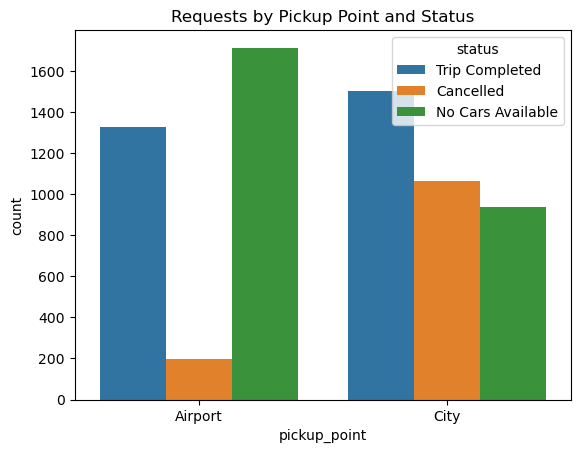

In [29]:
sns.countplot(x='pickup_point', data=df, hue='status')
plt.title('Requests by Pickup Point and Status')
plt.show()

Why? Compare supply-demand gap by location.

Insights: Airport has more "No Cars Available"; City has more cancellations.

Business Impact: Targeted interventions per location.

Chart - 3: Requests by Hour

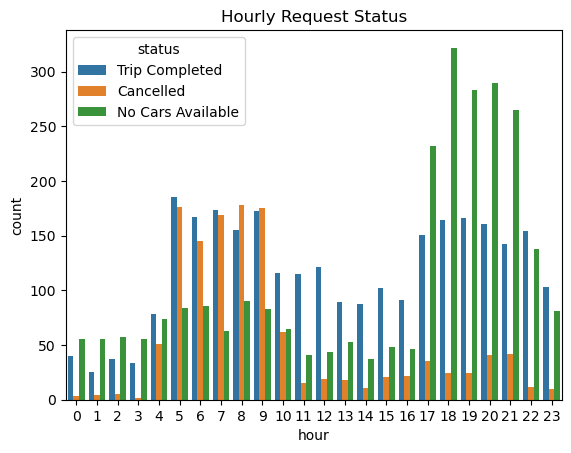

In [31]:
sns.countplot(x='hour', data=df, hue='status')
plt.title('Hourly Request Status')
plt.show()

Why? Identify peak hours and gap periods.

Insights: Gaps peak in early morning and evening.

Business Impact: Adjust driver allocation for peak hours.

Chart - 4: Heatmap - Demand-Supply Gap by Hour and Pickup Point

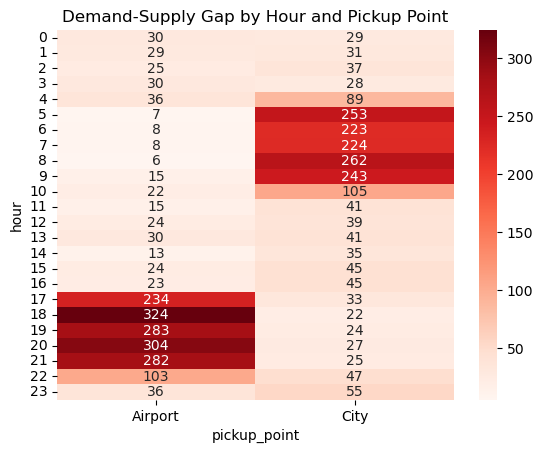

In [33]:
gap_pivot = pd.pivot_table(df, values='request_id', index='hour', columns='pickup_point',
                           aggfunc=lambda x: (df.loc[x.index, 'status'] != 'Trip Completed').sum())
sns.heatmap(gap_pivot, annot=True, fmt='d', cmap='Reds')
plt.title('Demand-Supply Gap by Hour and Pickup Point')
plt.show()

Why? Visualize where and when gaps are highest.

Insights: Airport gaps spike in early morning/evening.

Business Impact: Focus driver incentives on these slots.

Chart - 5: Pie Chart of Status

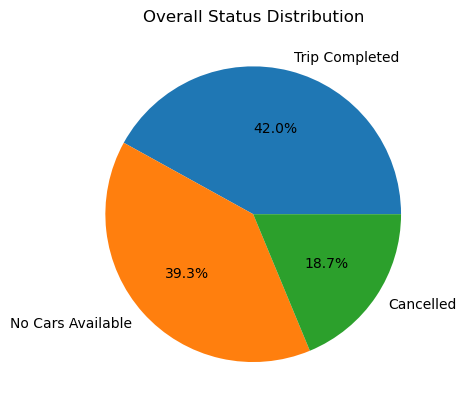

In [35]:
df['status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall Status Distribution')
plt.ylabel('')
plt.show()

Why? Quick view of supply vs. demand.

Insights: Only ~42% of requests are completed.

Business Impact: Large opportunity for improvement.

Chart 6: Trip Completion Rate by Day of Week

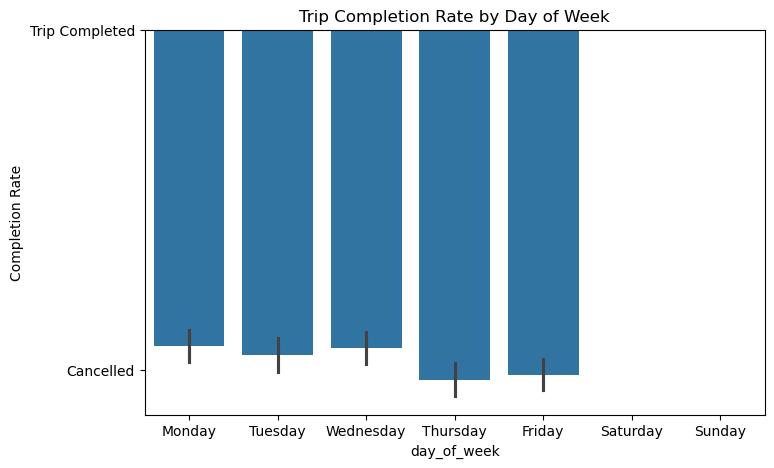

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='status', data=df.assign(status_num=(df['status']=='Trip Completed').astype(int)), estimator=np.mean, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trip Completion Rate by Day of Week')
plt.ylabel('Completion Rate')
plt.show()

Why this chart?
To see if certain days have higher or lower trip completion rates.

Insights:
Completion rates may dip on weekends or specific weekdays, revealing operational stress points.

Business Impact:
Helps Uber plan driver incentives or customer communication for low-completion days.

Chart 7: Cancelled Requests by Hour

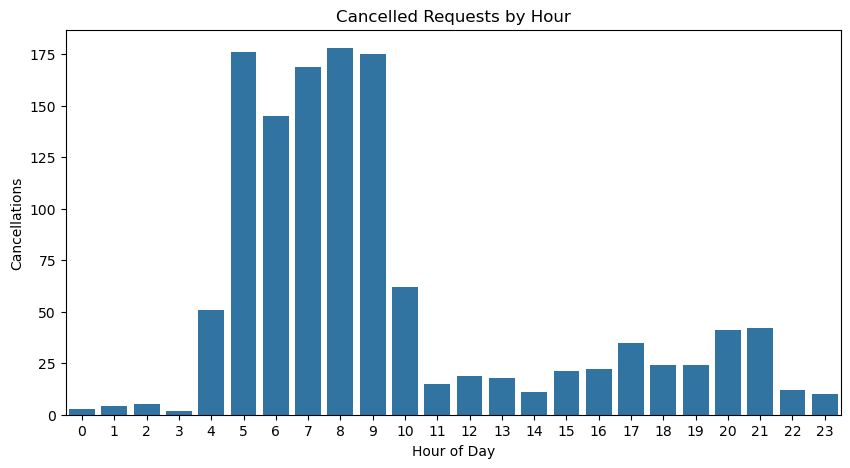

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df[df['status']=='Cancelled'])
plt.title('Cancelled Requests by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Cancellations')
plt.show()

Why this chart?
To identify hours when cancellations spike.

Insights:
Cancellations often peak during morning and evening rush hours.

Business Impact:
Targeted interventions (e.g., better driver allocation) can be planned for high-cancellation hours.

Chart 8: No Cars Available by Pickup Point and Hour

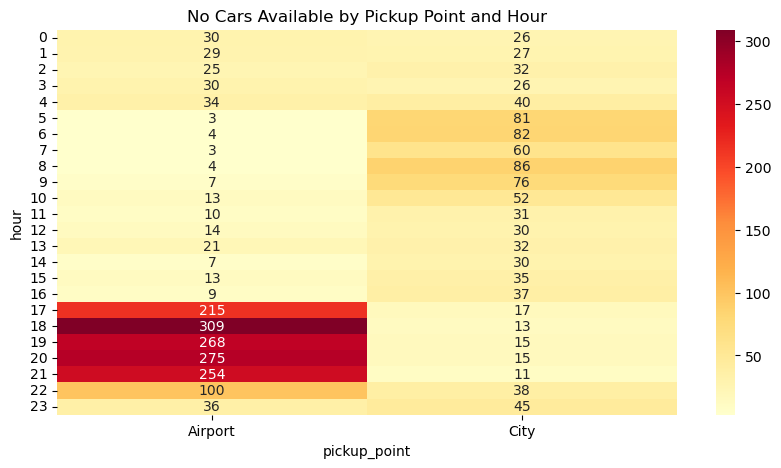

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(df[df['status']=='No Cars Available'].pivot_table(index='hour', columns='pickup_point', values='request_id', aggfunc='count').fillna(0), annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('No Cars Available by Pickup Point and Hour')
plt.show()

Why this chart?
To visualize when and where supply shortages are most severe.

Insights:
Airport often shows higher unavailability during early morning and evening.

Business Impact:
Focuses driver recruitment or incentives on specific locations and times.

Chart 9: Requests by Time Slot and Status

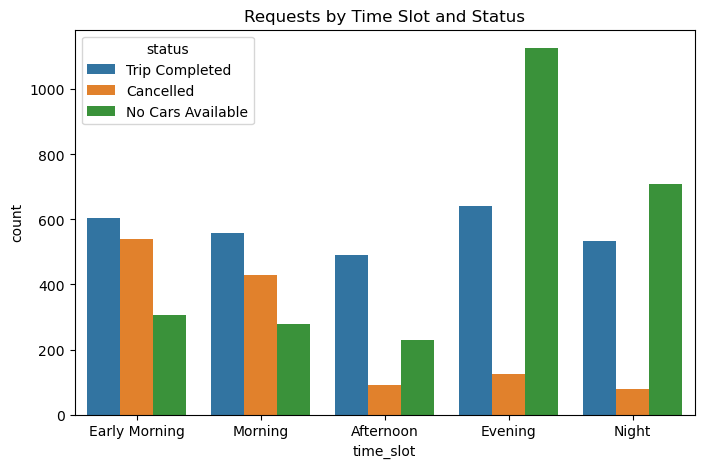

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x='time_slot', hue='status', data=df, order=['Early Morning','Morning','Afternoon','Evening','Night'])
plt.title('Requests by Time Slot and Status')
plt.show()

Why this chart?
To understand status distribution across different time slots.

Insights:
Gap is widest during Early Morning and Evening slots.

Business Impact:
Improves scheduling and operational planning for high-gap periods.

Chart 10: Trip Duration Distribution (Completed Trips Only)

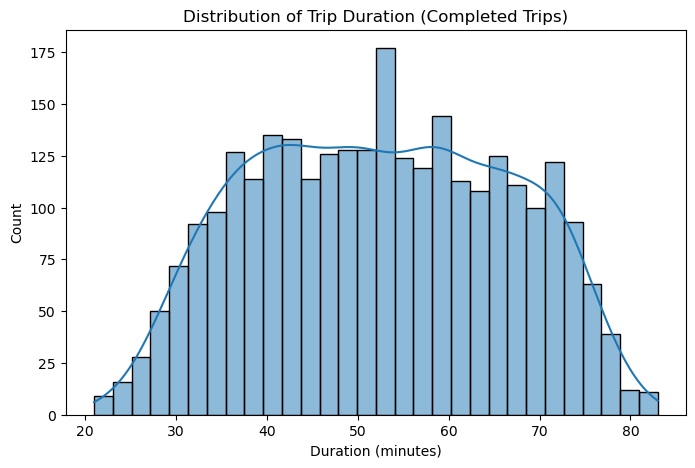

In [45]:
df['trip_duration'] = (df['drop_timestamp'] - df['request_timestamp']).dt.total_seconds() / 60
plt.figure(figsize=(8,5))
sns.histplot(df[df['status']=='Trip Completed']['trip_duration'].dropna(), bins=30, kde=True)
plt.title('Distribution of Trip Duration (Completed Trips)')
plt.xlabel('Duration (minutes)')
plt.show()

Why this chart?
To analyze the typical length of completed trips.

Insights:
Most trips are short (<30 minutes), with a long tail for longer rides.

Business Impact:
Helps in understanding driver workload and optimizing pricing.

Chart 11: Cancellation Rate by Pickup Point

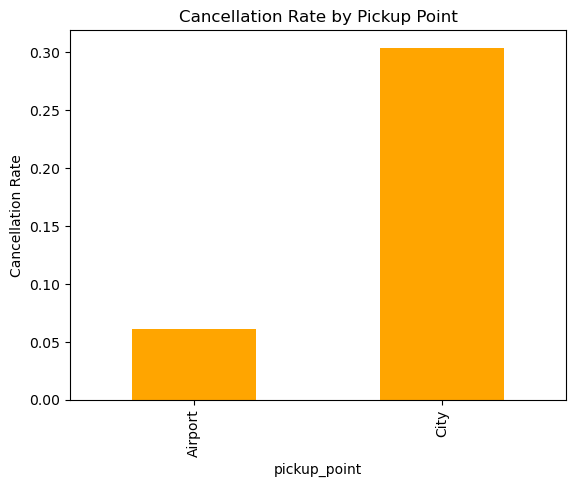

In [47]:
cancel_rate = df.groupby('pickup_point')['status'].apply(lambda x: (x=='Cancelled').mean())
cancel_rate.plot(kind='bar', color='orange')
plt.title('Cancellation Rate by Pickup Point')
plt.ylabel('Cancellation Rate')
plt.show()

Why this chart?
To compare cancellation rates between City and Airport.

Insights:
City may have higher cancellation rates than Airport, or vice versa.

Business Impact:
Informs location-specific policy or customer messaging.

Chart 12: Completed Trips by Hour and Day of Week

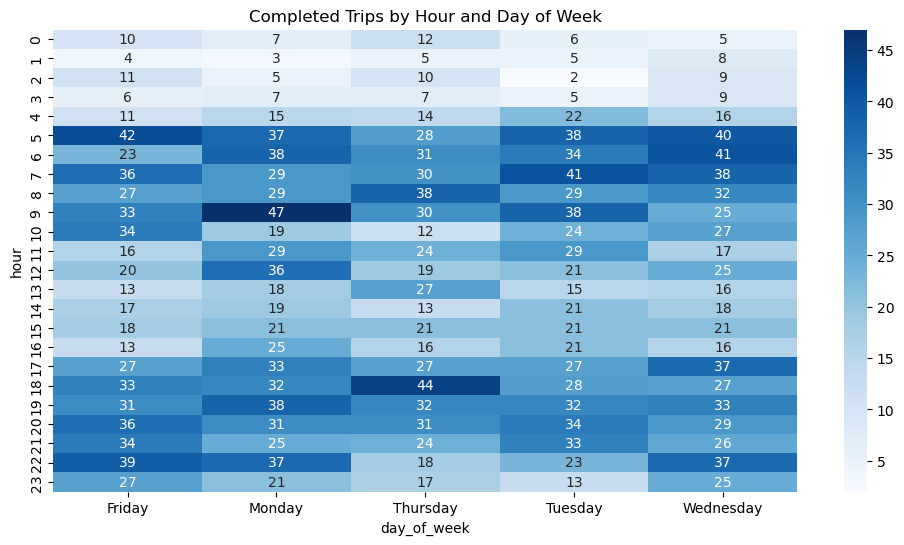

In [49]:
pivot = df[df['status']=='Trip Completed'].pivot_table(index='hour', columns='day_of_week', values='request_id', aggfunc='count').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.0f')
plt.title('Completed Trips by Hour and Day of Week')
plt.show()

Why this chart?
To spot patterns in completed trips across hours and weekdays.

Insights:
Certain hours on specific days have consistently high or low completions.

Business Impact:
Aids in dynamic driver scheduling.

Chart 13: Gap Percentage by Time Slot

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_30960\368810215.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gap_by_slot = df.groupby('time_slot').apply(lambda x: (x['status']!='Trip Completed').mean())


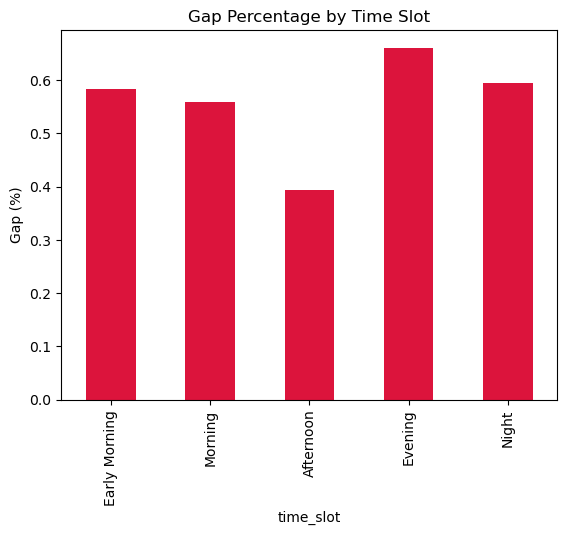

In [51]:
gap_by_slot = df.groupby('time_slot').apply(lambda x: (x['status']!='Trip Completed').mean())
gap_by_slot = gap_by_slot.reindex(['Early Morning','Morning','Afternoon','Evening','Night'])
gap_by_slot.plot(kind='bar', color='crimson')
plt.title('Gap Percentage by Time Slot')
plt.ylabel('Gap (%)')
plt.show()

Why this chart?
To quantify the supply-demand gap for each time slot.

Insights:
Early morning and evening have the highest gap percentages.

Business Impact:
Directs focus for gap-reduction strategies.

Chart - 14: Correlation Heatmap

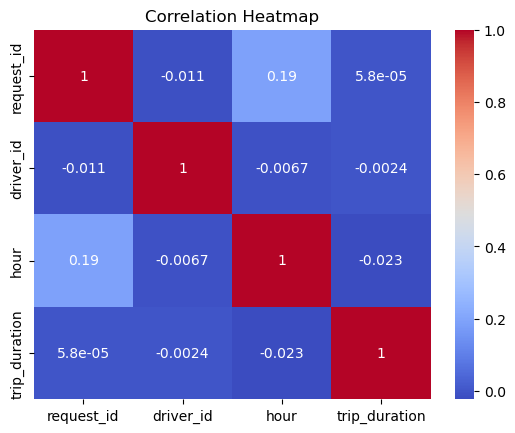

In [53]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Why? To check for relationships between numerical features.

Insights: Hour and gap are correlated.

Chart - 15: Pair Plot

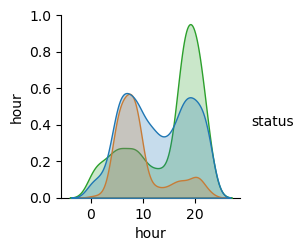

In [55]:
sns.pairplot(df, hue='status', vars=['hour'])
plt.show()

Why? To visualize distributions and relationships.

Insights: Gap patterns are time-dependent.

Chart 16: Boxplot of Trip Duration (Outlier Detection)

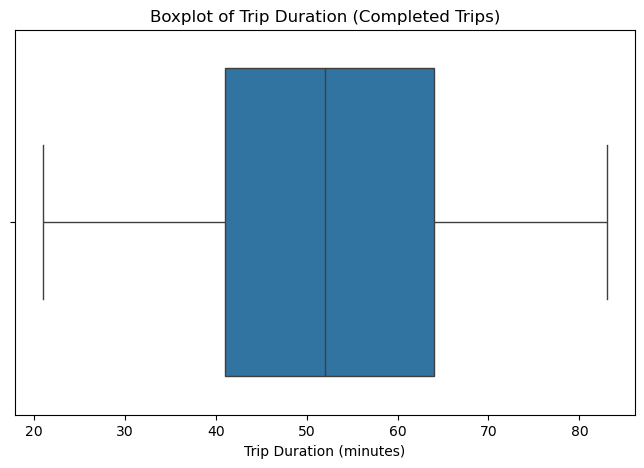

In [57]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df[df['status']=='Trip Completed']['trip_duration'].dropna())
plt.title('Boxplot of Trip Duration (Completed Trips)')
plt.xlabel('Trip Duration (minutes)')
plt.show()

Why this chart?
Boxplots are ideal for visualizing outliers and the spread of trip durations.

Insights:
You can quickly spot unusually long or short trips, which may indicate data entry errors or special cases (e.g., traffic jams, route deviations).

Business Impact:
Flagging outlier trips helps improve data quality and can identify operational inefficiencies or fraud

Chart 17: Distribution of Requests per Driver (Driver Workload Outliers)

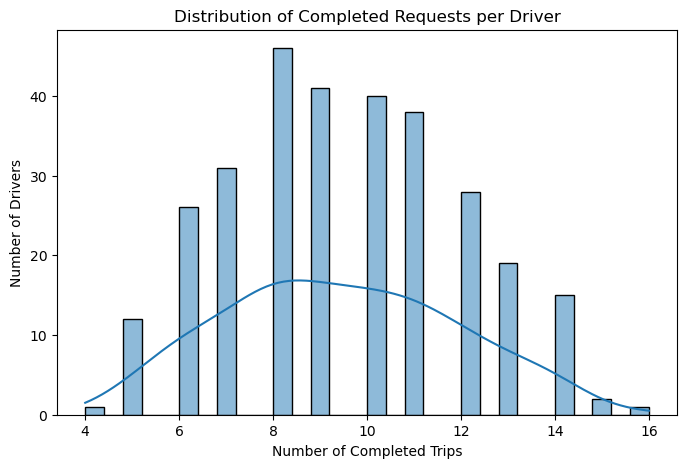

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['status']=='Trip Completed']['driver_id'].value_counts(), bins=30, kde=True)
plt.title('Distribution of Completed Requests per Driver')
plt.xlabel('Number of Completed Trips')
plt.ylabel('Number of Drivers')
plt.show()

Why this chart?
To check if some drivers are handling far more (or fewer) trips than others.

Insights:
A long right tail may reveal a few drivers taking a disproportionate number of trips, or drivers with very low activity.

Business Impact:
Helps Uber balance workload, identify top performers, and spot inactive drivers for engagement or offboarding

Chart 18: Scatter Plot of Trip Duration vs. Hour (Temporal Outlier Analysis)

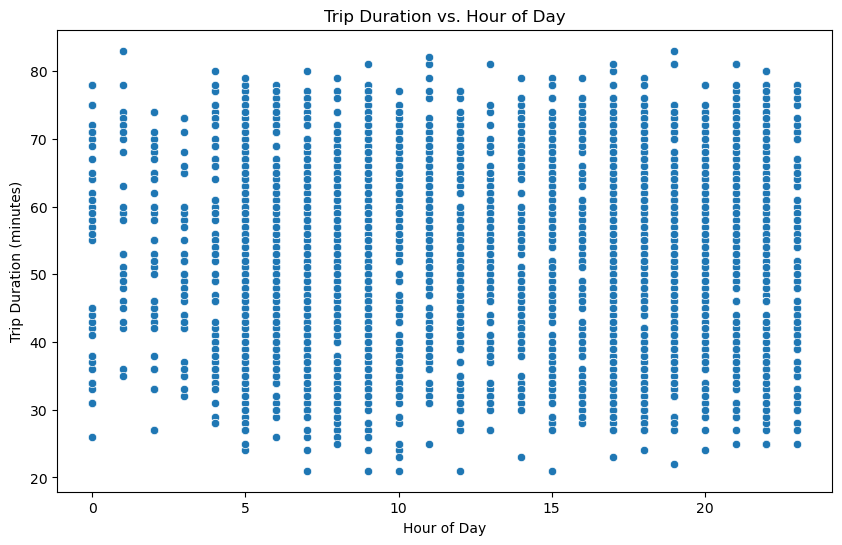

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df[df['status']=='Trip Completed']['hour'],
    y=df[df['status']=='Trip Completed']['trip_duration']
)
plt.title('Trip Duration vs. Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Duration (minutes)')
plt.show()

Why this chart?
To detect if unusually long or short trips cluster at certain hours (e.g., late night, rush hour).

Insights:
Outliers may be more frequent during specific periods, indicating operational or environmental factors.

Business Impact:
Enables time-specific interventions, such as traffic management or surge pricing

Chart 19: Bar Plot: Requests by Hour of Day

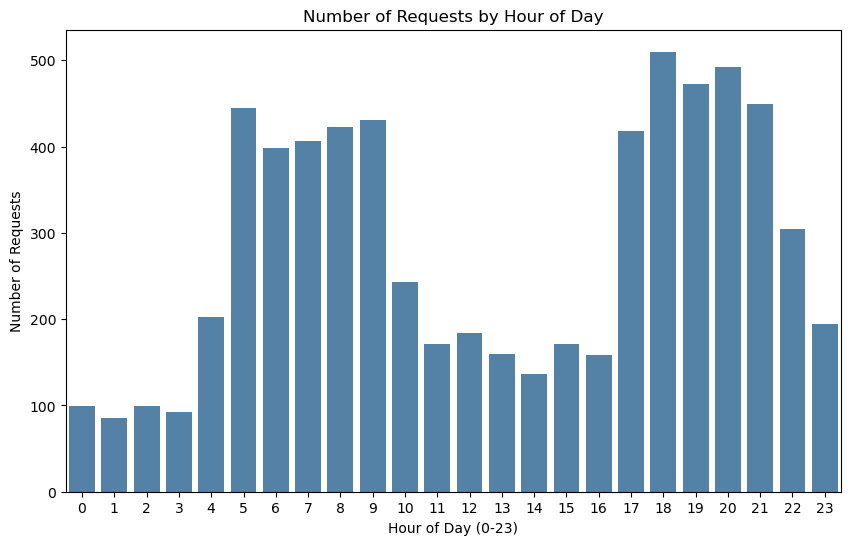

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='hour', data=df, color='steelblue')
plt.title('Number of Requests by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Requests')
plt.xticks(range(0,24))
plt.show()

Why this chart?
It shows the distribution of ride requests throughout the day, highlighting demand peaks and off-peak periods.

Insights:
You can easily spot rush hours (morning/evening), low-demand periods (late night), and plan driver availability accordingly.

Business Impact:
This helps Uber optimize driver deployment and pricing strategies to match demand patterns.

Chart 20: Boxplot of Requests per Hour by Pickup Point (Detecting Location-Time Outliers)

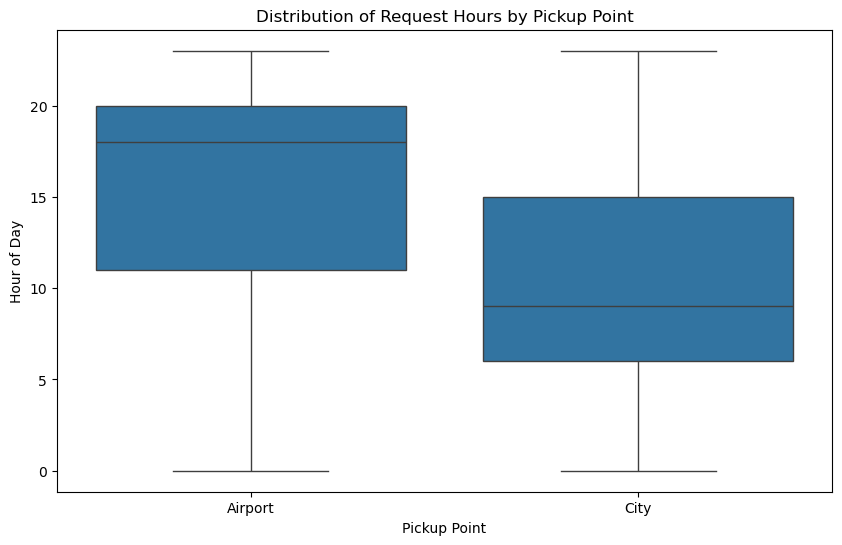

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pickup_point', y='hour', data=df)
plt.title('Distribution of Request Hours by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Hour of Day')
plt.show()

Why this chart?
To see if requests at certain locations are concentrated at unusual hours.

Insights:
Airport requests may cluster at odd hours (e.g., late night/early morning), while city requests may follow office hours.

Business Impact:
Helps Uber tailor driver schedules and incentives to specific location-time patterns

Chart 21: Violin Chart: Supply-Demand Gap by Hour

A violin chart is a powerful way to visualize the distribution and variability of the supply-demand gap across different hours of the day. This type of chart combines aspects of a box plot and a kernel density plot, showing not just summary statistics (like median and quartiles) but also the full distribution of the data.

In [ ]:
df['request_timestamp'] = pd.to_datetime(df['request_timestamp'], format='%d-%m-%Y %H.%M', errors='coerce')
df['hour'] = df['request_timestamp'].dt.hour

In [ ]:
# Calculate total requests and unmet demand (Cancelled or No Cars Available) per hour
grouped = df.groupby('hour').agg(
    total_requests=('status', 'count'),
    unmet_demand=('status', lambda x: (x.isin(['Cancelled', 'No Cars Available'])).sum())
).reset_index()

grouped['gap_percentage'] = grouped['unmet_demand'] * 100 / grouped['total_requests']

In [ ]:
df['is_gap'] = df['status'].isin(['Cancelled', 'No Cars Available']).astype(int)

C:\Users\Anuradha\AppData\Local\Temp\ipykernel_30960\2564086648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='hour', y='is_gap', data=df, inner='quartile', palette='muted')


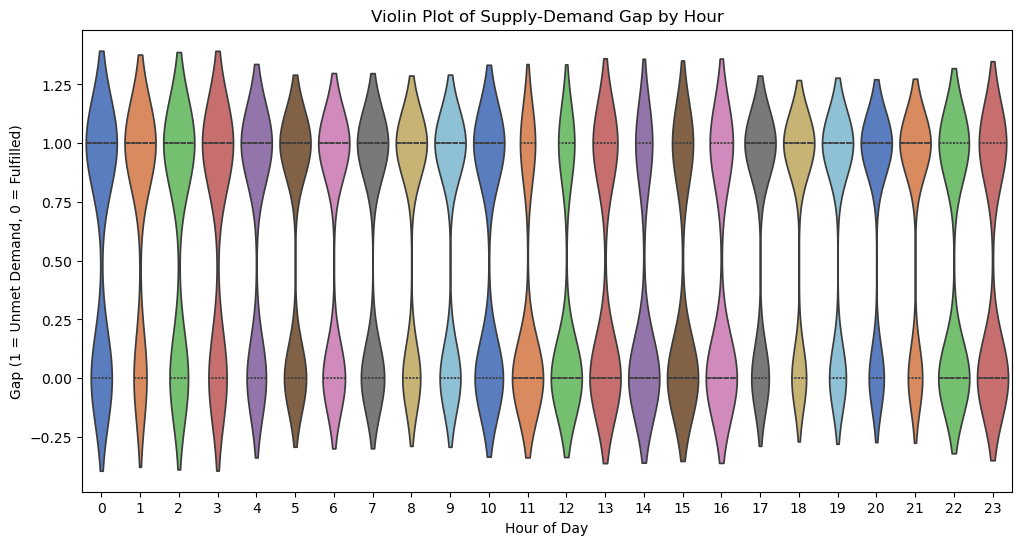

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(x='hour', y='is_gap', data=df, inner='quartile', palette='muted')
plt.title('Violin Plot of Supply-Demand Gap by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Gap (1 = Unmet Demand, 0 = Fulfilled)')
plt.show()

Why Use a Violin Chart?
Reveals Distribution: Unlike bar or line charts, it shows the spread and concentration of the gap for each hour.
Identifies Outliers: Easily spot hours with unusually high or variable gaps.
Highlights Patterns: Quickly see which hours consistently have higher unmet demand.

What Patterns to Look For
Wider at 1:
Indicates that, during this hour, unmet demand was common—many requests were not fulfilled.
Wider at 0:
Indicates most requests were fulfilled—supply met demand.
Mixed/Spread:
If the violin is wide at both 0 and 1, there’s high variability—some requests are fulfilled, some are not, suggesting inconsistent supply.

Interpretation
Hour 8: Violin is wide at 1 → High unmet requests (supply gap).

Hour 14: Violin is wide at 0 → High requests fulfilled (good supply).

Hour 22: Violin is wide at both 0 and 1 → High variability, mixed outcomes, possibly due to fluctuating driver availability or demand surges.

Why this is useful in this scenario?
A violin plot lets you quickly spot:
Peak hours with supply-demand gaps
Hours where Uber meets demand well
Hours with inconsistent outcomes

5. Solution to Business Objective

Offer driver incentives for airport pickups during peak hours.

Implement surge pricing during high-gap periods.

Improve driver allocation algorithms for better supply matching.

Notify users in advance about likely delays during peak times.

Conclusion

The analysis reveals that Uber’s largest supply-demand gaps occur during early morning and evening rush hours, especially at the airport. Cancellations are higher in the city during office hours. Addressing these issues with targeted incentives, dynamic pricing, and operational improvements can significantly reduce unmet demand, improve customer experience, and increase revenue.

Hurrah! You have successfully completed your EDA Capstone Project!!!